In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from yahoo_fin import stock_info as si

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [1]:
a=[]
max(a)

ValueError: max() arg is an empty sequence

In [2]:
x = yf.Ticker("X")

In [3]:
monthly_data = x.history(period="30d")

In [4]:
monthly_data.shape

(30, 7)

In [5]:
len(monthly_data)

30

In [6]:
def moving_averages(data, interval, period):
    # moving average for every period days
    mov = []
    k = interval
    while k < period:
        s = 0
        for i in range(interval):
            s += data.iloc[[-i + k]]["Close"].values[0]
        s = round(s / interval, 4)
        mov.append(s)
        k += 1
    return(mov)

In [7]:
moving_averages_5 = moving_averages(monthly_data, 7, 30)
moving_averages_10 = moving_averages(monthly_data, 14, 30)

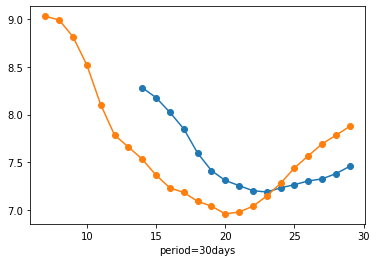

In [8]:
xlim1 = range(14, 30)
xlim2 = range(7, 30)
plt.scatter(xlim1, moving_averages_10)
plt.plot(xlim1, moving_averages_10)
plt.scatter(xlim2, moving_averages_5)
plt.plot(xlim2, moving_averages_5)
plt.xlabel("period=30days")
plt.show()

In [127]:
AC = yf.Ticker("CPE")
five_year_data = AC.history(period="5y")

In [128]:
ying = []
l = len(five_year_data)
for i in range(0, l):
    if ((five_year_data.iloc[i]["Close"] - five_year_data.iloc[i]["Open"]) > 0):
        m = "Rise"
    else:
        m = "Fall"
    if (m == "Fall"):
        open_at_fall = five_year_data.iloc[i]["Open"]
        for k in range(i, l):
            if ((five_year_data.iloc[k]["Close"] - five_year_data.iloc[k]["Open"]) > 0):
                m1 = "Rise"
            else:
                m1 = "Fall"
            if (k - i < 3):
                if (m1 == "Rise"):
                    break
            
            if (m1 == "Rise"):
                if ((five_year_data.iloc[k]["Close"] - open_at_fall) > 0):
                    a = 0
                    if (k > len(five_year_data) - 8):
                        break
                    for s in range(k + 1, k + 8):
                        a += five_year_data.iloc[s]["High"]
                    a = round(a / 7, 4)
                    ying.append((five_year_data.iloc[k].name, five_year_data.iloc[k]["Close"], a))
                        
                    
                break
                
            

In [129]:
young = []
l = len(five_year_data)
for i in range(0, l):
    if ((five_year_data.iloc[i]["Close"] - five_year_data.iloc[i]["Open"]) > 0):
        m = "Rise"
    else:
        m = "Fall"
    if (m == "Fall"):
        open_at_fall = five_year_data.iloc[i]["Open"]
        for k in range(i, l):
            if ((five_year_data.iloc[k]["Close"] - five_year_data.iloc[k]["Open"]) > 0):
                m1 = "Rise"
            else:
                m1 = "Fall"
            if (k - i < 3):
                if (m1 == "Rise"):
                    break
            
            if (m1 == "Rise"):
                if ((five_year_data.iloc[k]["Close"] - open_at_fall) > 0):
                    a = []
                    if (k > len(five_year_data) - 8):
                        break
                    for s in range(k + 1, k + 8):
                        a.append(five_year_data.iloc[s]["High"])
                    a = max(a)
                    young.append((five_year_data.iloc[k].name, five_year_data.iloc[k]["Close"], a))
                        
                    
                break
                
            

In [130]:
young

[(Timestamp('2016-05-25 00:00:00'), 11.41, 12.0),
 (Timestamp('2016-12-13 00:00:00'), 17.4, 16.83),
 (Timestamp('2017-01-03 00:00:00'), 15.82, 16.32),
 (Timestamp('2017-01-25 00:00:00'), 15.23, 15.81),
 (Timestamp('2017-05-12 00:00:00'), 12.45, 12.96),
 (Timestamp('2018-05-17 00:00:00'), 14.09, 14.14),
 (Timestamp('2018-09-19 00:00:00'), 11.8, 12.5),
 (Timestamp('2018-09-19 00:00:00'), 11.8, 12.5),
 (Timestamp('2018-11-07 00:00:00'), 11.08, 11.23),
 (Timestamp('2018-12-26 00:00:00'), 6.48, 7.89),
 (Timestamp('2019-06-17 00:00:00'), 6.27, 6.75),
 (Timestamp('2019-08-07 00:00:00'), 4.79, 5.22),
 (Timestamp('2019-09-16 00:00:00'), 5.32, 5.28),
 (Timestamp('2019-11-04 00:00:00'), 4.19, 4.84),
 (Timestamp('2020-02-05 00:00:00'), 3.2, 3.21)]

In [131]:
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.chrome.options import Options
# chrome_options = Options()
# chrome_options.add_argument("headless")
# driver = webdriver.Chrome("/Users/adamyuan/miniconda3/chromedriver", options=chrome_options)
# def get_real_time_price(stock_name): 
#     elem = driver.get("https://ca.finance.yahoo.com")
#     search_box = driver.find_element_by_id("yfin-usr-qry")
#     search_box.send_keys(stock_name)
#     search_box.send_keys(Keys.ENTER)
#     driver.implicitly_wait(10)
#     price_str = driver.find_element_by_xpath(".//*[@class='Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)']").text
#     price = float(price_str.replace(',', ''))
#     return price
# def get_open(stock_name):
#     elem = driver.get("https://ca.finance.yahoo.com")
#     search_box = driver.find_element_by_id("yfin-usr-qry")
#     search_box.send_keys(stock_name)
#     search_box.send_keys(Keys.ENTER)
#     driver.implicitly_wait(10)
#     price_str = driver.find_element_by_xpath(".//*[@data-test='OPEN-value']/*[@class='Trsdu(0.3s) ']").text
#     price = float(price_str.replace(',', ''))
#     return price

In [132]:
def predict(stock_name, yang):
    stock = yf.Ticker(stock_name)
    ten_days_data = stock.history(period="10d")
    l = len(ten_days_data)
    real_open = round(si.get_live_price(stock_name), 4)
    real_price = round(si.get_live_price(stock_name), 4)
    for i in range(0, l):
        if ((ten_days_data.iloc[i]["Close"] - ten_days_data.iloc[i]["Open"]) > 0):
            m = "Rise"
        else:
            m = "Fall"
        if (m == "Fall"):
            open_at_fall = ten_days_data.iloc[i]["Open"]
            for k in range(i, l):
                close = ten_days_data.iloc[k]["Close"]
                openp = ten_days_data.iloc[k]["Open"]
                if (k == l - 1):
                    close = real_price
                    openp = real_open
                if ((close - openp) > 0):
                    m1 = "Rise"
                else:
                    m1 = "Fall"
                if (k - i < 3):
                    if (m1 == "Rise"):
                        break

                if (m1 == "Rise"):
                    if ((close - open_at_fall) > 0):
                        if (k == l - 1):
                            yang.append(stock_name)
                            return
                    break
        
                

In [133]:
def predict_mult(stocks):
    yang = []
    for string in stocks:
        predict(string, yang)
    return yang

In [134]:
stock_names = ["AAB.TO", "AAV.TO", "ABT.TO", "ABX.TO", "AC.TO", "ACB.TO", "ACD.TO", "ACQ.TO", "ACZ.TO", "AD.TO", "ADN.TO", "AEF.TO", "AEM.TO", "AEZS.TO", "AFN.TO", "AGI.TO", "AH.TO", "AI.TO", "AIF.TO", "AII.TO", "AIM.TO", "AJX.TO", "AKU.TO", "ALA.TO", "ALB.TO", "ALC.TO", "ALFA.TO", "ALO.TO", "ALS.TO", "ALYA.TO", "AMM.TO", "AND.TO", "ANX.TO", "AOI.TO", "AOT.TO", "APHA.TO", "APS.TO", "APY.TO", "AQA.TO", "AQN.TO", "AR.TO", "ARB.TO", "ARE.TO", "ARG.TO", "ARX.TO", "ASM.TO", "ASND.TO", "ASP.TO", "ASR.TO", "AT.TO", "ATA.TO", "ATH.TO", "ATP.TO", "ATSX.TO", "ATZ.TO", "AUG.TO", "AUMN.TO", "AUP.TO", "AVCN.TO", "AVL.TO", "AVP.TO", "AXU.TO", "AYM.TO", "AZZ.TO", "BAD.TO", "BASE.TO", "BB.TO", "BCE.TO", "BCI.TO", "BDI.TO", "BDIV.TO", "BDT.TO", "BFIN.TO", "BGC.TO", "BGU.TO", "BHC.TO", "BIPC.TO", "BIR.TO", "BK.TO", "BKI.TO", "BKX.TO", "BLDP.TO", "BLOV.TO", "BLU.TO", "BLX.TO", "BMO.TO", "BNAU.TO", "BNC.TO", "BND.TO", "BNE.TO", "BNG.TO", "BNK.TO", "BNP.TO", "BNS.TO", "BOS.TO", "BOY.TO", "BPRF.TO", "BR.TO", "BRE.TO", "BREA.TO", "BRY.TO", "BSC.TO", "BSX.TO", "BTE.TO", "BTO.TO", "BU.TO", "BUI.TO", "BXF.TO", "BYD.TO", "BYL.TO", "CACB.TO", "CAE.TO", "CAFR.TO", "CAGG.TO", "CAGS.TO", "CAL.TO", "CALL.TO", "CARS.TO", "CAS.TO", "CBH.TO", "CBO.TO", "CCA.TO", "CCM.TO", "CCO.TO", "CCOR.TO", "CDAY.TO", "CDLB.TO", "CDV.TO", "CDZ.TO", "CEE.TO", "CEF.TO", "CERV.TO", "CET.TO", "CEU.TO", "CEW.TO", "CF.TO", "CFF.TO", "CFLX.TO", "CFP.TO", "CFW.TO", "CFX.TO", "CG.TO", "CGAA.TO", "CGG.TO", "CGI.TO", "CGL.TO", "CGO.TO", "CGR.TO", "CGRA.TO", "CGRE.TO", "CGX.TO", "CGXF.TO", "CGY.TO", "CHB.TO", "CHH.TO", "CHR.TO", "CHW.TO", "CIA.TO", "CIC.TO", "CIF.TO", "CIGI.TO", "CINF.TO", "CIX.TO", "CJ.TO", "CJT.TO", "CKI.TO", "CLF.TO", "CLG.TO", "CLIQ.TO", "CLQ.TO", "CLR.TO", "CLS.TO", "CM.TO", "CMAG.TO", "CMAR.TO", "CMCE.TO", "CMEY.TO", "CMG.TO", "CMMC.TO", "CMR.TO", "CMUE.TO", "CNE.TO", "CNQ.TO", "CNR.TO", "CNT.TO", "CNU.TO", "COG.TO", "COMM.TO", "CORP.TO", "COW.TO", "CP.TO", "CPD.TO", "CPG.TO", "CPH.TO", "CPI.TO", "CPX.TO", "CR.TO", "CRDL.TO", "CRED.TO", "CRH.TO", "CRON.TO", "CRP.TO", "CRRX.TO", "CRWN.TO", "CS.TO", "CSAV.TO", "CSD.TO", "CSM.TO", "CSU.TO", "CSY.TO", "CTC.TO", "CTX.TO", "CU.TO", "CUD.TO", "CVD.TO", "CVE.TO", "CVG.TO", "CWB.TO", "CWEB.TO", "CWL.TO", "CWW.TO", "CWX.TO", "CXB.TO", "CXF.TO", "CXI.TO", "CYB.TO", "CYBR.TO", "CYH.TO", "DANC.TO", "DBO.TO", "DCBO.TO", "DCC.TO", "DCG.TO", "DCM.TO", "DCP.TO", "DCS.TO", "DCU.TO", "DF.TO", "DFC.TO", "DFD.TO", "DFE.TO", "DFN.TO", "DFU.TO", "DGR.TO", "DGRC.TO", "DGS.TO", "DIAM.TO", "DISC.TO", "DIV.TO", "DIVS.TO", "DLR.TO", "DML.TO", "DN.TO", "DNG.TO", "DNT.TO", "DOL.TO", "DOO.TO", "DPM.TO", "DQD.TO", "DQI.TO", "DR.TO", "DRCU.TO", "DRFC.TO", "DRFD.TO", "DRFE.TO", "DRFG.TO", "DRFU.TO", "DRM.TO", "DRMC.TO", "DRMU.TO", "DRT.TO", "DRX.TO", "DS.TO", "DSG.TO", "DXB.TO", "DXC.TO", "DXF.TO", "DXG.TO", "DXI.TO", "DXM.TO", "DXN.TO", "DXO.TO", "DXP.TO", "DXU.TO", "DXV.TO", "DXZ.TO", "DYA.TO", "E.TO", "EARN.TO", "ECN.TO", "ECO.TO", "EDGE.TO", "EDGF.TO", "EDR.TO", "EDT.TO", "EDV.TO", "EFH.TO", "EFL.TO", "EFN.TO", "EFR.TO", "EFX.TO", "EGIF.TO", "EGLX.TO", "EHE.TO", "EIF.TO", "ELD.TO", "ELEF.TO", "ELF.TO", "ELR.TO", "ELV.TO", "EMA.TO", "ENB.TO", "ENGH.TO", "ENS.TO", "EOX.TO", "EQB.TO", "EQL.TO", "EQX.TO", "ER.TO", "ERD.TO", "ERF.TO", "ERO.TO", "ESG.TO", "ESGA.TO", "ESGB.TO", "ESGE.TO", "ESGF.TO", "ESGG.TO", "ESGY.TO", "ESI.TO", "ESM.TO", "ESN.TO", "ET.TO", "ETG.TO", "ETHI.TO", "ETP.TO", "ETX.TO", "EUR.TO", "EVT.TO", "EXE.TO", "EXF.TO", "EXN.TO", "FAF.TO", "FAI.TO", "FAO.TO", "FAP.TO", "FAR.TO", "FBE.TO", "FBU.TO", "FC.TO", "FCCB.TO", "FCCD.TO", "FCCL.TO", "FCCQ.TO", "FCCV.TO", "FCGB.TO", "FCGI.TO", "FCHH.TO", "FCHY.TO", "FCID.TO", "FCIG.TO", "FCIL.TO", "FCIM.TO", "FCIQ.TO", "FCIV.TO", "FCLH.TO", "FCMH.TO", "FCMI.TO", "FCMO.TO", "FCQH.TO", "FCRH.TO", "FCRR.TO", "FCSB.TO", "FCU.TO", "FCUD.TO", "FCUH.TO", "FCUL.TO", "FCUQ.TO", "FCUV.TO", "FCVH.TO", "FDV.TO", "FEC.TO", "FF.TO", "FFH.TO", "FFN.TO", "FGB.TO", "FGO.TO", "FHB.TO", "FHC.TO", "FHD.TO", "FHE.TO", "FHF.TO", "FHG.TO", "FHH.TO", "FHI.TO", "FHM.TO", "FHQ.TO", "FHU.TO", "FIE.TO", "FIG.TO", "FINT.TO", "FIRE.TO", "FLAM.TO", "FLB.TO", "FLBA.TO", "FLCD.TO", "FLCI.TO", "FLCP.TO", "FLDM.TO", "FLEM.TO", "FLGA.TO", "FLGD.TO", "FLI.TO", "FLJA.TO", "FLOT.TO", "FLRM.TO", "FLSD.TO", "FLSL.TO", "FLUI.TO", "FLUR.TO", "FLUS.TO", "FM.TO", "FN.TO", "FNV.TO", "FOOD.TO", "FOUR.TO", "FPR.TO", "FQC.TO", "FR.TO", "FRII.TO", "FRU.TO", "FRX.TO", "FSB.TO", "FSF.TO", "FSL.TO", "FSR.TO", "FST.TO", "FSV.TO", "FSY.TO", "FSZ.TO", "FT.TO", "FTB.TO", "FTG.TO", "FTN.TO", "FTS.TO", "FTT.TO", "FTU.TO", "FUD.TO", "FVI.TO", "FVL.TO", "FXC.TO", "FXM.TO", "GAU.TO", "GBT.TO", "GC.TO", "GCG.TO", "GCL.TO", "GCM.TO", "GCT.TO", "GDC.TO", "GDI.TO", "GDL.TO", "GDV.TO", "GEI.TO", "GEO.TO", "GFL.TO", "GGA.TO", "GGD.TO", "GH.TO", "GIL.TO", "GLG.TO", "GLO.TO", "GLXY.TO", "GMO.TO", "GMP.TO", "GMX.TO", "GOLD.TO", "GOOS.TO", "GPR.TO", "GRC.TO", "GSC.TO", "GSV.TO", "GSY.TO", "GTE.TO", "GTMS.TO", "GUD.TO", "GUY.TO", "GVC.TO", "GWO.TO", "GWR.TO", "GXE.TO", "H.TO", "HAB.TO", "HAC.TO", "HAD.TO", "HAF.TO", "HAJ.TO", "HAL.TO", "HARC.TO", "HAU.TO", "HAZ.TO", "HBA.TO", "HBAL.TO", "HBB.TO", "HBD.TO", "HBF.TO", "HBG.TO", "HBGD.TO", "HBLK.TO", "HBM.TO", "HBP.TO", "HBU.TO", "HCA.TO", "HCB.TO", "HCG.TO", "HCN.TO", "HCON.TO", "HCRE.TO", "HDGE.TO", "HDI.TO", "HE.TO", "HEA.TO", "HED.TO", "HEE.TO", "HEF.TO", "HEJ.TO", "HEMB.TO", "HEP.TO", "HERO.TO", "HEU.TO", "HEWB.TO", "HEX.TO", "HEXO.TO", "HFA.TO", "HFD.TO", "HFG.TO", "HFMU.TO", "HFP.TO", "HFR.TO", "HFT.TO", "HFU.TO", "HFY.TO", "HGD.TO", "HGGG.TO", "HGM.TO", "HGR.TO", "HGRO.TO", "HGU.TO", "HGY.TO", "HHF.TO", "HHL.TO", "HIG.TO", "HII.TO", "HIU.TO", "HIX.TO", "HLF.TO", "HLPR.TO", "HLS.TO", "HMJI.TO", "HMJU.TO", "HMMJ.TO", "HMP.TO", "HND.TO", "HNL.TO", "HNU.TO", "HNY.TO", "HOD.TO", "HOG.TO", "HOU.TO", "HPF.TO", "HPR.TO", "HQD.TO", "HQU.TO", "HRA.TO", "HRES.TO", "HRT.TO", "HRX.TO", "HSAV.TO", "HSD.TO", "HSE.TO", "HSH.TO", "HSL.TO", "HSM.TO", "HSU.TO", "HTA.TO", "HTB.TO", "HTH.TO", "HUBL.TO", "HUC.TO", "HUF.TO", "HUG.TO", "HUIB.TO", "HUL.TO", "HULC.TO", "HUM.TO", "HUN.TO", "HURA.TO", "HUT.TO", "HUTL.TO", "HUV.TO", "HUZ.TO", "HWF.TO", "HWO.TO", "HWX.TO", "HXCN.TO", "HXD.TO", "HXDM.TO", "HXE.TO", "HXF.TO", "HXH.TO", "HXQ.TO", "HXS.TO", "HXT.TO", "HXU.TO", "HXX.TO", "HYI.TO", "HZD.TO", "HZM.TO", "HZU.TO", "IAG.TO", "IBG.TO", "ICE.TO", "ICPB.TO", "IDG.TO", "IDR.TO", "IFA.TO", "IFC.TO", "IFP.TO", "IFRF.TO", "IGAF.TO", "IGB.TO", "IGCF.TO", "IGLB.TO", "IGM.TO", "III.TO", "ILV.TO", "IMG.TO", "IMO.TO", "IMP.TO", "IMV.TO", "IN.TO", "INE.TO", "INOC.TO", "INQ.TO", "INV.TO", "IPCI.TO", "IPCO.TO", "IPL.TO", "IPLP.TO", "IPO.TO", "IQD.TO", "ISIF.TO", "ISV.TO", "ITH.TO", "ITP.TO", "IVN.TO", "IVQ.TO", "JAG.TO", "JAPN.TO", "JE.TO", "JOSE.TO", "JOY.TO", "JWEL.TO", "K.TO", "KBL.TO", "KEL.TO", "KER.TO", "KEY.TO", "KILO.TO", "KL.TO", "KLS.TO", "KOR.TO", "KPT.TO", "KRN.TO", "KRR.TO", "KXS.TO", "L.TO", "LABS.TO", "LAC.TO", "LAM.TO", "LB.TO", "LBS.TO", "LCS.TO", "LFE.TO", "LGD.TO", "LGO.TO", "LIF.TO", "LIFE.TO", "LMNL.TO", "LN.TO", "LNF.TO", "LNR.TO", "LONG.TO", "LS.TO", "LSPD.TO", "LUC.TO", "LUG.TO", "LUN.TO", "LXR.TO", "MAG.TO", "MAL.TO", "MARI.TO", "MAV.TO", "MAW.TO", "MAX.TO", "MAXR.TO", "MBA.TO", "MBN.TO", "MBX.TO", "MCB.TO", "MCLC.TO", "MCSB.TO", "MCSM.TO", "MDF.TO", "MDI.TO", "MDNA.TO", "ME.TO", "MEE.TO", "MEG.TO", "MEQ.TO", "MEU.TO", "MFC.TO", "MFI.TO", "MFT.TO", "MG.TO", "MGA.TO", "MGB.TO", "MIC.TO", "MIN.TO", "MIND.TO", "MINT.TO", "MIVG.TO", "MKB.TO", "MKC.TO", "MKP.TO", "MMX.TO", "MND.TO", "MNS.TO", "MNT.TO", "MOGO.TO", "MOZ.TO", "MPC.TO", "MPCF.TO", "MPVD.TO", "MQR.TO", "MRC.TO", "MRD.TO", "MRE.TO", "MRU.TO", "MSI.TO", "MSV.TO", "MTL.TO", "MTY.TO", "MUB.TO", "MULC.TO", "MUMC.TO", "MUS.TO", "MUSC.TO", "MUX.TO", "MWD.TO", "MX.TO", "MXG.TO", "MXU.TO", "MYA.TO", "NA.TO", "NALT.TO", "NB.TO", "NCF.TO", "NCP.TO", "NCU.TO", "NDM.TO", "NEO.TO", "NEPT.TO", "NEXA.TO", "NEXT.TO", "NFAM.TO", "NFI.TO", "NG.TO", "NGD.TO", "NGPE.TO", "NGT.TO", "NHK.TO", "NHYB.TO", "NML.TO", "NOA.TO", "NPI.TO", "NPK.TO", "NPRF.TO", "NREA.TO", "NRI.TO", "NSCE.TO", "NSGE.TO", "NSR.TO", "NTR.TO", "NUBF.TO", "NVA.TO", "NVCN.TO", "NWC.TO", "NXE.TO", "NXF.TO", "NXJ.TO", "NZC.TO", "OBE.TO", "OGC.TO", "OGD.TO", "OGI.TO", "OLA.TO", "OLY.TO", "OMI.TO", "ONC.TO", "ONEB.TO", "ONEQ.TO", "ONEX.TO", "OPS.TO", "OPT.TO", "OR.TO", "ORA.TO", "OREA.TO", "ORL.TO", "ORV.TO", "OSB.TO", "OSK.TO", "OSP.TO", "OTEX.TO", "OVV.TO", "OXC.TO", "PAAS.TO", "PAT.TO", "PATH.TO", "PAYF.TO", "PBD.TO", "PBH.TO", "PBI.TO", "PBL.TO", "PCOR.TO", "PD.TO", "PDC.TO", "PDF.TO", "PDIV.TO", "PDV.TO", "PEA.TO", "PEY.TO", "PFAE.TO", "PFB.TO", "PFIA.TO", "PFL.TO", "PFMN.TO", "PFMS.TO", "PG.TO", "PHE.TO", "PHO.TO", "PHR.TO", "PHW.TO", "PHX.TO", "PHYS.TO", "PID.TO", "PIF.TO", "PIN.TO", "PINC.TO", "PINV.TO", "PKI.TO", "PL.TO", "PLC.TO", "PLDI.TO", "PLV.TO", "PME.TO", "PMIF.TO", "PMM.TO", "PMN.TO", "PMNT.TO", "PMT.TO", "PMTS.TO", "PNE.TO", "PNP.TO", "POM.TO", "PONY.TO", "POU.TO", "POW.TO", "PPL.TO", "PPR.TO", "PPS.TO", "PR.TO", "PRA.TO", "PREF.TO", "PRM.TO", "PRMW.TO", "PRN.TO", "PRP.TO", "PRQ.TO", "PRU.TO", "PSA.TO", "PSB.TO", "PSD.TO", "PSI.TO", "PSK.TO", "PSLV.TO", "PSY.TO", "PTB.TO", "PTG.TO", "PTM.TO", "PTS.TO", "PUD.TO", "PVG.TO", "PXC.TO", "PXG.TO", "PXS.TO", "PXT.TO", "PYF.TO", "PZA.TO", "PZC.TO", "PZW.TO", "QAH.TO", "QBB.TO", "QBTL.TO", "QCD.TO", "QCE.TO", "QCN.TO", "QDX.TO", "QEBH.TO", "QEBL.TO", "QEC.TO", "QEM.TO", "QHY.TO", "QIE.TO", "QMA.TO", "QMY.TO", "QSB.TO", "QSR.TO", "QTRH.TO", "QUDV.TO", "QUIG.TO", "QUS.TO", "QUU.TO", "QXM.TO", "RBA.TO", "RBDI.TO", "RBNK.TO", "RBO.TO", "RBOT.TO", "RCD.TO", "RCE.TO", "RCH.TO", "RDL.TO", "REAL.TO", "RECP.TO", "REIT.TO", "RFP.TO", "RGRE.TO", "RID.TO", "RIDH.TO", "RIE.TO", "RIFI.TO", "RIG.TO", "RIIN.TO", "RIRA.TO", "RIT.TO", "RIV.TO", "RLB.TO", "RLD.TO", "RLE.TO", "RMBO.TO", "RME.TO", "RMX.TO", "RNW.TO", "RNX.TO", "ROOT.TO", "ROXG.TO", "RPD.TO", "RPDH.TO", "RPF.TO", "RPSB.TO", "RQH.TO", "RQI.TO", "RQJ.TO", "RQK.TO", "RQL.TO", "RQN.TO", "RSI.TO", "RTG.TO", "RUBH.TO", "RUBY.TO", "RUD.TO", "RUDH.TO", "RUE.TO", "RUEH.TO", "RUS.TO", "RUSB.TO", "RVX.TO", "RWC.TO", "RWE.TO", "RWU.TO", "RWW.TO", "RWX.TO", "RXD.TO", "RXE.TO", "RY.TO", "S.TO", "SAM.TO", "SAP.TO", "SAU.TO", "SBB.TO", "SBC.TO", "SBI.TO", "SBN.TO", "SBR.TO", "SBT.TO", "SCAD.TO", "SCL.TO", "SCU.TO", "SCY.TO", "SEA.TO", "SEC.TO", "SES.TO", "SFC.TO", "SFD.TO", "SFIX.TO", "SGQ.TO", "SGY.TO", "SHLE.TO", "SHOP.TO", "SHZ.TO", "SIA.TO", "SID.TO", "SII.TO", "SIL.TO", "SINT.TO", "SIS.TO", "SJ.TO", "SLF.TO", "SLR.TO", "SMC.TO", "SMF.TO", "SMT.TO", "SNC.TO", "SOLG.TO", "SOP.TO", "SOX.TO", "SOY.TO", "SPB.TO", "SPG.TO", "SPPP.TO", "SRHI.TO", "SRX.TO", "SSL.TO", "SSRM.TO", "STEP.TO", "STGO.TO", "STLC.TO", "STN.TO", "STPL.TO", "SU.TO", "SUSA.TO", "SVB.TO", "SVM.TO", "SVR.TO", "SW.TO", "SWP.TO", "SXI.TO", "SXP.TO", "SYLD.TO", "SZLS.TO", "T.TO", "TA.TO", "TAO.TO", "TBL.TO", "TC.TO", "TCLB.TO", "TCLV.TO", "TCN.TO", "TCS.TO", "TCSB.TO", "TCW.TO", "TD.TO", "TDB.TO", "TEC.TO", "TEI.TO", "TEV.TO", "TF.TO", "TFII.TO", "TGED.TO", "TGFI.TO", "TGGR.TO", "TGL.TO", "TGO.TO", "TGOD.TO", "TGRE.TO", "TGZ.TO", "TH.TO", "The.TO", "THU.TO", "TI.TO", "TIH.TO", "TILV.TO", "TINF.TO", "TKO.TO", "TLF.TO", "TLG.TO", "TLO.TO", "TLV.TO", "TMD.TO", "TML.TO", "TMQ.TO", "TMR.TO", "TNP.TO", "TNX.TO", "TOG.TO", "TOT.TO", "TOU.TO", "TOY.TO", "TPAY.TO", "TPE.TO", "TPRF.TO", "TPU.TO", "TQCD.TO", "TQGD.TO", "TQGM.TO", "TQSM.TO", "TRI.TO", "TRIL.TO", "TRL.TO", "TRP.TO", "TRQ.TO", "TRZ.TO", "TSL.TO", "TSU.TO", "TTP.TO", "TUED.TO", "TUHY.TO", "TULB.TO", "TULV.TO", "TUSB.TO", "TV.TO", "TVE.TO", "TVK.TO", "TWC.TO", "TWM.TO", "TXF.TO", "TXG.TO", "TXP.TO", "TZS.TO", "U.TO", "UDA.TO", "UEX.TO", "UFS.TO", "UMI.TO", "UNC.TO", "UNI.TO", "UNS.TO", "UR.TO", "URB.TO", "URE.TO", "USA.TO", "USB.TO", "UXM.TO", "VA.TO", "VAB.TO", "VAH.TO", "VB.TO", "VBAL.TO", "VBG.TO", "VBU.TO", "VCB.TO", "VCE.TO", "VCIP.TO", "VCM.TO", "VCN.TO", "VCNS.TO", "VDU.TO", "VDY.TO", "VE.TO", "VEE.TO", "VEF.TO", "VEH.TO", "VEQT.TO", "VET.TO", "VFF.TO", "VFV.TO", "VGAB.TO", "VGCX.TO", "VGG.TO", "VGH.TO", "VGRO.TO", "VGV.TO", "VGZ.TO", "VI.TO", "VIDY.TO", "VII.TO", "VIU.TO", "VIVO.TO", "VLB.TO", "VLE.TO", "VLN.TO", "VLNS.TO", "VLQ.TO", "VMD.TO", "VMO.TO", "VNP.TO", "VRE.TO", "VSB.TO", "VSC.TO", "VSG.TO", "VSP.TO", "VUN.TO", "VUS.TO", "VVL.TO", "VVO.TO", "VXC.TO", "VXM.TO", "WBR.TO", "WCN.TO", "WCP.TO", "WDO.TO", "WEED.TO", "WEF.TO", "WELL.TO", "WFC.TO", "WFS.TO", "WFT.TO", "WILD.TO", "WJX.TO", "WLLW.TO", "WM.TO", "WN.TO", "WOMN.TO", "WPK.TO", "WPM.TO", "WPRT.TO", "WRG.TO", "WRN.TO", "WRX.TO", "WSP.TO", "WSRD.TO", "WSRI.TO", "WTE.TO", "WXM.TO", "X.TO", "XAM.TO", "XAU.TO", "XAW.TO", "XBAL.TO", "XBB.TO", "XBM.TO", "XCB.TO", "XCD.TO", "XCG.TO", "XCH.TO", "XCNS.TO", "XCS.TO", "XCSR.TO", "XCT.TO", "XCV.TO", "XDG.TO", "XDGH.TO", "XDIV.TO", "XDSR.TO", "XDU.TO", "XDUH.TO", "XDV.TO", "XEB.TO", "XEC.TO", "XEF.TO", "XEG.TO", "XEH.TO", "XEI.TO", "XEM.TO", "XEN.TO", "XEQT.TO", "XESG.TO", "XEU.TO", "XFA.TO", "XFC.TO", "XFF.TO", "XFH.TO", "XFI.TO", "XFN.TO", "XFR.TO", "XFS.TO", "XGB.TO", "XGD.TO", "XGI.TO", "XGRO.TO", "XHB.TO", "XHC.TO", "XHD.TO", "XHU.TO", "XHY.TO", "XIC.TO", "XID.TO", "XIG.TO", "XIN.TO", "XINC.TO", "XIT.TO", "XIU.TO", "XLB.TO", "XMA.TO", "XMC.TO", "XMD.TO", "XMH.TO", "XMI.TO", "XML.TO", "XMM.TO", "XMS.TO", "XMTM.TO", "XMU.TO", "XMV.TO", "XMW.TO", "XMY.TO", "XPF.TO", "XQB.TO", "XQLT.TO", "XQQ.TO", "XRB.TO", "XRE.TO", "XSAB.TO", "XSB.TO", "XSC.TO", "XSE.TO", "XSEA.TO", "XSEM.TO", "XSH.TO", "XSI.TO", "XSMC.TO", "XSMH.TO", "XSP.TO", "XSQ.TO", "XST.TO", "XSTB.TO", "XSU.TO", "XSUS.TO", "XTC.TO", "XTD.TO", "XTG.TO", "XTR.TO", "XUH.TO", "XUS.TO", "XUSR.TO", "XUT.TO", "XUU.TO", "XVLU.TO", "XWD.TO", "XXM.TO", "Y.TO", "YCM.TO", "YGR.TO", "YRB.TO", "YRI.TO", "YXM.TO", "ZAG.TO", "ZAR.TO", "ZBAL.TO", "ZBK.TO", "ZCB.TO", "ZCH.TO", "ZCM.TO", "ZCN.TO", "ZCON.TO", "ZCPB.TO", "ZCS.TO", "ZDB.TO", "ZDH.TO", "ZDI.TO", "ZDJ.TO", "ZDM.TO", "ZDV.TO", "ZDY.TO", "ZEA.TO", "ZEB.TO", "ZEF.TO", "ZEM.TO", "ZENA.TO", "ZEO.TO", "ZEQ.TO", "ZESG.TO", "ZFC.TO", "ZFH.TO", "ZFL.TO", "ZFM.TO", "ZFN.TO", "ZFS.TO", "ZGB.TO", "ZGD.TO", "ZGI.TO", "ZGQ.TO", "ZGRO.TO", "ZGSB.TO", "ZHP.TO", "ZHU.TO", "ZHY.TO", "ZIC.TO", "ZID.TO", "ZIN.TO", "ZJG.TO", "ZJK.TO", "ZJN.TO", "ZJO.TO", "ZLB.TO", "ZLC.TO", "ZLD.TO", "ZLE.TO", "ZLH.TO", "ZLI.TO", "ZLU.TO", "ZMBS.TO", "ZMI.TO", "ZMID.TO", "ZMP.TO", "ZMSB.TO", "ZMT.TO", "ZMU.TO", "ZNQ.TO", "ZPAY.TO", "ZPH.TO", "ZPL.TO", "ZPR.TO", "ZPS.TO", "ZPW.TO", "ZQB.TO", "ZQQ.TO", "ZRE.TO", "ZRR.TO", "ZSB.TO", "ZSP.TO", "ZST.TO", "ZSU.TO", "ZUB.TO", "ZUD.TO", "ZUE.TO", "ZUH.TO", "ZUP.TO", "ZUQ.TO", "ZUT.TO", "ZVC.TO", "ZVI.TO", "ZVU.TO", "ZWA.TO", "ZWB.TO", "ZWC.TO", "ZWE.TO", "ZWG.TO", "ZWH.TO", "ZWK.TO", "ZWP.TO", "ZWS.TO", "ZWU.TO", "ZXM.TO", "ZZZ.TO", "ZZZD.TO"]

In [135]:
stk = ["X","MXC","SNDE","HOME","FVAC","LAD","BLNK","AG","OGEN","BE","HL","POOL","ABB","TREE","CSL","ORCC","NIO","TSLA","PDD","AMD","FUTU","BNTX","BABA","PFE","MSFT","HTBX","BA","TNXP","AAPL","MRNA","SPCE","SQ","JD","AMZN","OXY","HTZ","BLCT","KC","GSX","MXC","NFLX","AAL","BYND","JMIA","MOMO","KO","AZN","TSM","CAN","CHEK","FB","CCL","SNDE","NVDA","NKLA","DOYU","SNAP","IBIO","WB","BIDU","LMT","TCOM","WIMI","WORK","TME","SE","SHOP","BNGO","HUYA","OGEN","TAT","FE","OBLG","FSLY","ZM","NOVN","INO","NCLH","UAL","TIGR","LX","DAL","NVAX","INTC","JAMF","LVGO","WFC","DIS","M","API","EQ","QTT","UXIN","IQ","ROKU","PRPO","GDS","BMRA","TWLO","NTEC","ERIC","RTX","SONO","BLNK","DFFN","SYSX"]

In [136]:
predict_mult(stk)

[]

In [137]:
issue_stk = ["TD.TO", "ENB.TO"]

In [138]:
predict_mult(issue_stk)

[]

In [139]:
round(si.get_live_price("TD.TO"), 4)

61.5